In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv("pizza_sales.csv")

In [4]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
df.shape

(48620, 12)

In [6]:
print(df['order_date'].unique()[:40])

['01-01-2015' '02-01-2015' '03-01-2015' '04-01-2015' '05-01-2015'
 '06-01-2015' '07-01-2015' '08-01-2015' '09-01-2015' '10-01-2015'
 '11-01-2015' '12-01-2015' '13-01-2015' '14-01-2015' '15-01-2015'
 '16-01-2015' '17-01-2015' '18-01-2015' '19-01-2015' '20-01-2015'
 '21-01-2015' '22-01-2015' '23-01-2015' '24-01-2015' '25-01-2015'
 '26-01-2015' '27-01-2015' '28-01-2015' '29-01-2015' '30-01-2015'
 '31-01-2015' '01-02-2015' '02-02-2015' '03-02-2015' '04-02-2015'
 '05-02-2015' '06-02-2015' '07-02-2015' '08-02-2015' '09-02-2015']


In [7]:
# change data type order_date object to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')

In [8]:
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [9]:
invalid_dates = df[df['order_date'].isna()]
print(invalid_dates.head())

Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


In [10]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time

In [11]:
# chaeck missing data
print('Missing Dates:', df['order_date'].isna().sum())
print('Missing Times:', df['order_time'].isna().sum())

Missing Dates: 0
Missing Times: 0


In [12]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [13]:
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [14]:
# Extract Year, Month, Day, Weekday, Hour
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.strftime('%b')
df['month_no'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.strftime('%a')
df['hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.hour

In [15]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,month_no,day,weekday,hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,Jan,1,1,Thu,11
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,Jan,1,1,Thu,11
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,Jan,1,1,Thu,11
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,Jan,1,1,Thu,11
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,Jan,1,1,Thu,11


In [16]:
df.describe()

,pizza_id,order_id,quantity,order_date,unit_price,total_price,year,month_no,day,hour
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000,48620.0,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474,2015.0,6.451131,15.461662,15.911806
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000,2015.0,1.000000,1.000000,9.000000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000,2015.0,3.000000,8.000000,13.000000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000,2015.0,6.000000,15.000000,16.000000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000,2015.0,9.000000,23.000000,18.000000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000,2015.0,12.000000,31.000000,23.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398,0.0,3.435420,8.809041,3.149836


In [17]:
#Total Revenue
total_revenue = df['total_price'].sum()
print('Total Revenue', total_revenue)

Total Revenue 817860.05


In [18]:
#Total Orders
total_orders = df['order_id'].nunique()
print('Total Orders', total_orders)

Total Orders 21350


In [19]:
# Total Pizza Sold
total_pizza_sold = df['quantity'].sum()
print('Total Pizza Sold', total_pizza_sold)

Total Pizza Sold 49574


In [20]:
#Avgrage Pizza Per Order
avg_pizza_per_order = total_pizza_sold / total_orders
print('Avg Pizza Per order', avg_pizza_per_order)

Avg Pizza Per order 2.321967213114754


In [21]:
#Average Order Value
avg_order_value = total_revenue / total_orders
print('Avg Order Value', avg_order_value)

Avg Order Value 38.30726229508197


In [22]:
#Revenue Per Pizza
revenue_per_pizza = total_revenue / total_pizza_sold
print('Revenue Per Pizza', revenue_per_pizza)

Revenue Per Pizza 16.497761931657724


In [23]:
#Monthly Revenue
monthly_revenue = df.groupby('month')['total_price'].sum().reset_index()
print(monthly_revenue)

   month  total_price
0    Apr     68736.80
1    Aug     68278.25
2    Dec     64701.15
3    Feb     65159.60
4    Jan     69793.30
5    Jul     72557.90
6    Jun     68230.20
7    Mar     70397.10
8    May     71402.75
9    Nov     70395.35
10   Oct     64027.60
11   Sep     64180.05


In [24]:
#Day Wise Orders
day_wise_orders = df.groupby('order_date')['order_id'].nunique().reset_index().sort_values(by='order_id', ascending=False).head(5)
print(day_wise_orders)

    order_date  order_id
324 2015-11-27       115
323 2015-11-26       113
283 2015-10-15       107
184 2015-07-04       105
134 2015-05-15        94


In [25]:
top5 = df.groupby('pizza_name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(5)
print("Top 5 pizza:", top5)

Top 5 pizza:                     pizza_name  quantity
7     The Classic Deluxe Pizza      2453
0   The Barbecue Chicken Pizza      2432
12          The Hawaiian Pizza      2422
20         The Pepperoni Pizza      2418
30      The Thai Chicken Pizza      2371


In [26]:
bottom5 = df.groupby('pizza_name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=True).head(5)
print("Bottom 5 pizza:", bottom5)

Bottom 5 pizza:                    pizza_name  quantity
2        The Brie Carre Pizza       490
16    The Mediterranean Pizza       934
3         The Calabrese Pizza       937
28  The Spinach Supreme Pizza       950
24      The Soppressata Pizza       961


In [27]:
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
year                          int32
month                        object
month_no                      int32
day                           int32
weekday                      object
hour                          int32
dtype: object

# Monthly Revenue

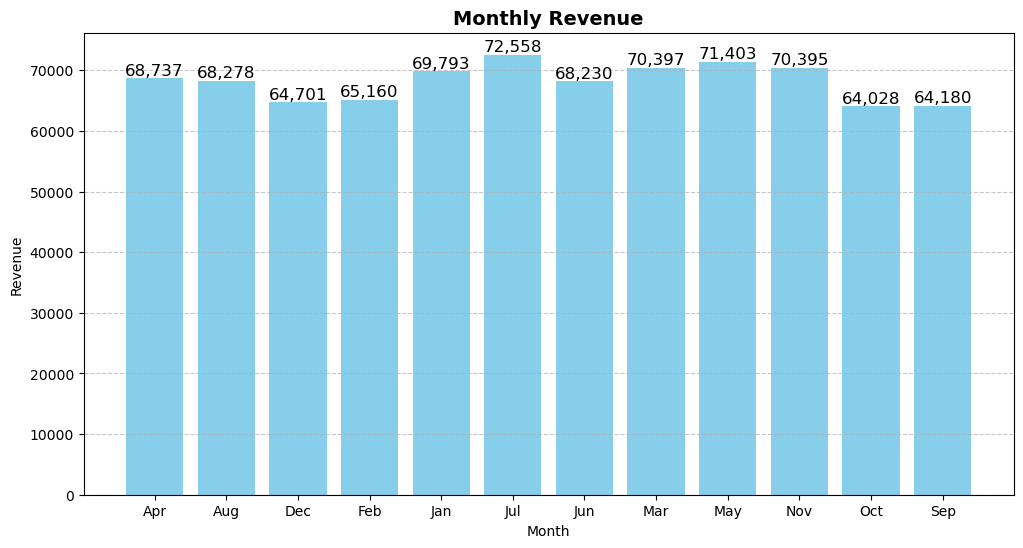

In [28]:
monthly_revenue = df.groupby('month')['total_price'].sum().reset_index()

plt.figure(figsize=(12,6))
bars = plt.bar(monthly_revenue['month'], monthly_revenue['total_price'], color='skyblue')
plt.title('Monthly Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#data label
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,.0f}", ha='center', va='bottom', fontsize=12)
plt.show()

# Hourly Orders Trend

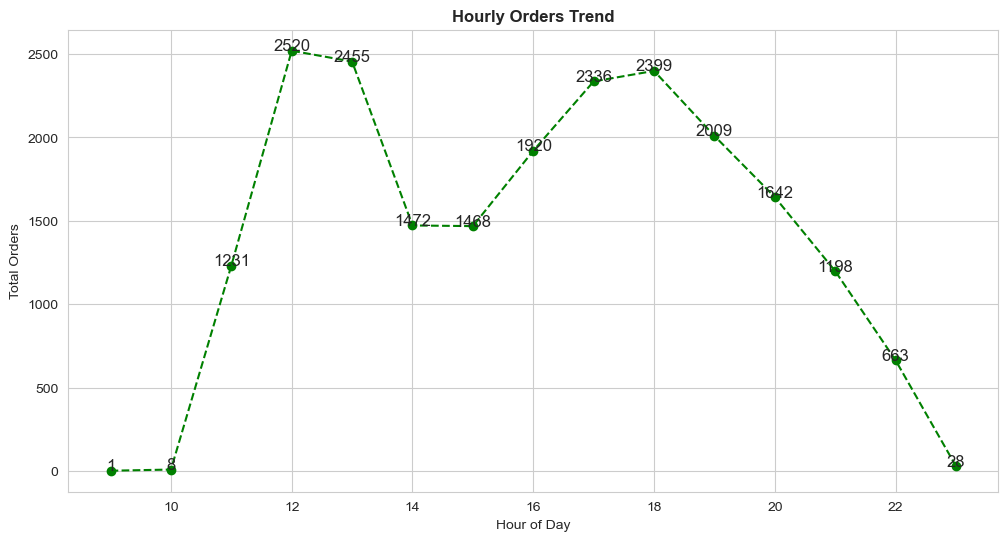

,hour,order_id
0,9,1
1,10,8
2,11,1231
3,12,2520
4,13,2455
5,14,1472
6,15,1468
7,16,1920
8,17,2336
9,18,2399


In [42]:
hourly_orders = df.groupby('hour')['order_id'].nunique().reset_index()

plt.figure(figsize=(12,6))
plt.plot(hourly_orders['hour'], hourly_orders['order_id'], marker='o', linestyle='--', color='green')
plt.title('Hourly Orders Trend', fontsize=12, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.grid(True)

#data values
for i, val in enumerate(hourly_orders['order_id']):
    plt.text(hourly_orders['hour'][i], val+1, str(val), ha='center', fontsize=12)
plt.show()
hourly_orders

# Sales by Pizza Category

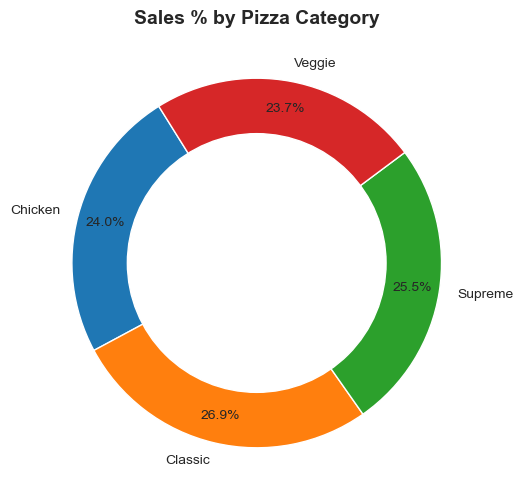

In [43]:
category_sales = df.groupby('pizza_category')['total_price'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.pie(category_sales['total_price'], labels=category_sales['pizza_category'], autopct='%1.1f%%', startangle=122, pctdistance=0.85)
center_circle = plt.Circle((0,0),0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Sales % by Pizza Category", fontsize=14, fontweight='bold')
plt.show()

# Sales Pizza Size by Pizza Categroy

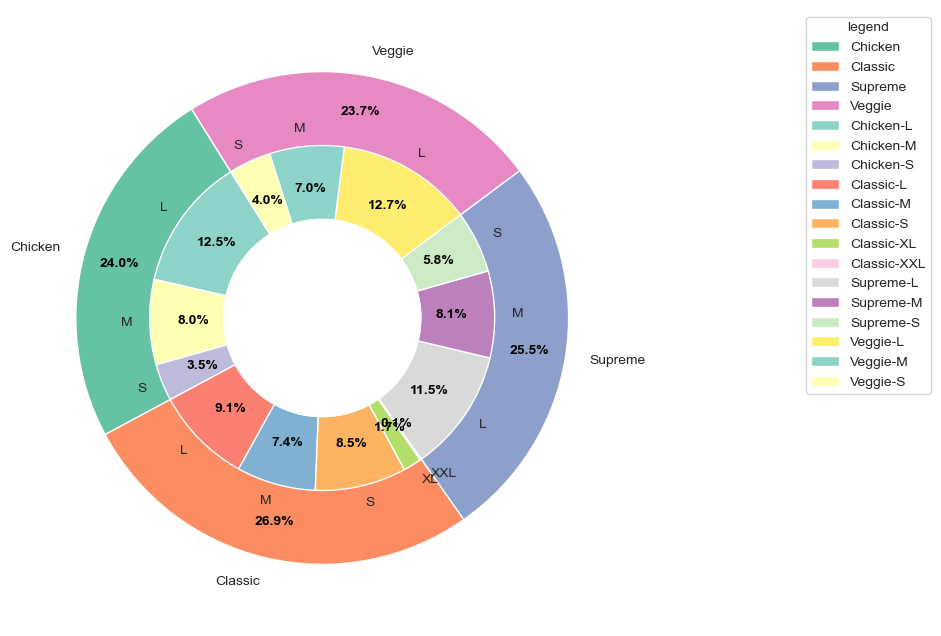

pizza_category  pizza_size
Chicken         L             102339.00
                M              65224.50
                S              28356.00
Classic         L              74518.50
                M              60581.75
                S              69870.25
                XL             14076.00
                XXL             1006.60
Supreme         L              94258.50
                M              66475.00
                S              47463.50
Veggie          L             104202.70
                M              57101.00
                S              32386.75
Name: total_price, dtype: float64

In [44]:
cat_group = df.groupby(['pizza_category'])['total_price'].sum()
size_group = df.groupby(['pizza_category','pizza_size'])['total_price'].sum()

cat_colors = sns.color_palette('Set2', len(cat_group))
size_colors = sns.color_palette('Set3', len(size_group))

fig, ax = plt.subplots(figsize=(8,8))
wedges1, text1, autotext1 = ax.pie(
    cat_group,
    labels = cat_group.index,
    radius=1, colors=cat_colors, 
    startangle=122,
    autopct = lambda pct: f"{pct:.1f}%",
    pctdistance = 0.85,
    wedgeprops = dict(width=0.4, edgecolor='w')
)

wedges2, text2, autotext2 = ax.pie(
    size_group,
    labels = [f"{i[1]}" for i in size_group.index],
    radius=0.7, colors=size_colors, 
    autopct = lambda pct: f"{pct:.1f}%",
    startangle=122,
    pctdistance = 0.75,
    wedgeprops = dict(width=0.3, edgecolor='white')
)

for t in autotext1 + autotext2:
    t.set_color('black')
    t.set_fontweight('bold')
center_circle = plt.Circle((0,0),0.4, fc='white')
fig.gca().add_artist(center_circle)
ax.legend(
    wedges1 + wedges2,
    list(cat_group.index) + [f"{r}-{c}" for r,c in  size_group.index],
    title='legend',
    bbox_to_anchor=(1, 0, 0.5, 1)
    )
plt.show()
cat_group
size_group

# Sales by Pizza Size

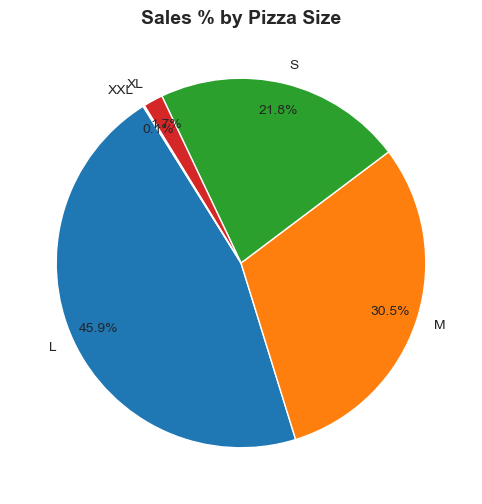

In [45]:
pizza_size_sales = df.groupby('pizza_size')['total_price'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.pie(pizza_size_sales['total_price'], labels=pizza_size_sales['pizza_size'], autopct='%1.1f%%', startangle=122, pctdistance=0.85)
plt.title("Sales % by Pizza Size", fontsize=14, fontweight='bold')
plt.show()

# Pizza Sold by Category

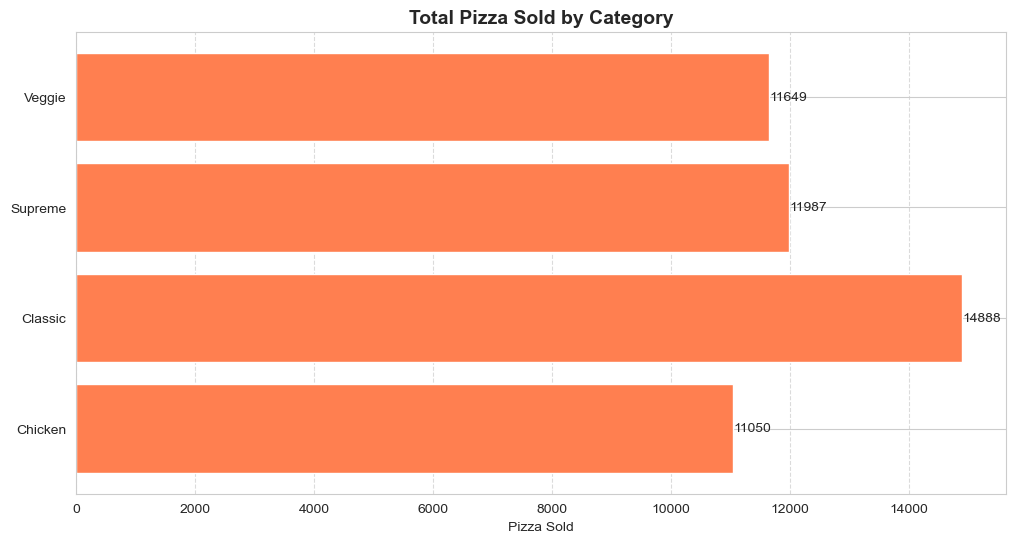

In [46]:
funnel_data = df.groupby('pizza_category')['quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
bars = plt.barh(funnel_data['pizza_category'], funnel_data['quantity'], color='coral')
plt.title('Total Pizza Sold by Category', fontsize=14, fontweight='bold')
plt.xlabel('Pizza Sold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

#data label
for bar in bars:
    plt.text(bar.get_width()+5, bar.get_y()+bar.get_height()/2,
            str(bar.get_width()), va='center')

plt.show()

# Top 5 Best-Selling Pizzas

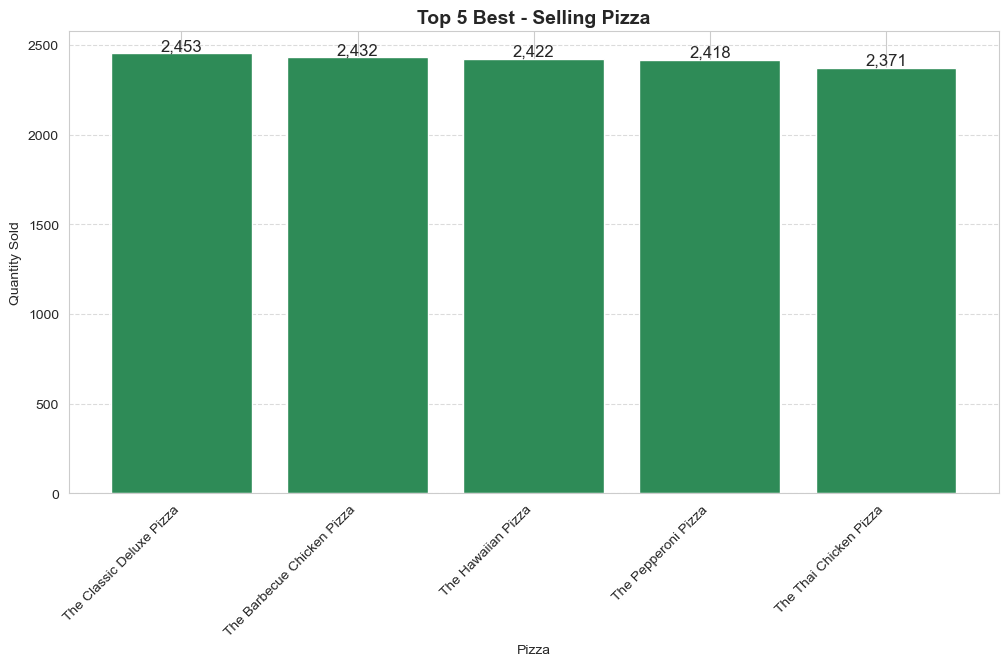

,pizza_name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371


In [49]:
top5 = df.groupby('pizza_name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(5)

plt.figure(figsize=(12,6))
bars = plt.bar(top5['pizza_name'], top5['quantity'], color='seagreen')
plt.title('Top 5 Best - Selling Pizza', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Pizza')
plt.ylabel('Quantity Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#data label
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,.0f}", ha='center', va='bottom', fontsize=12)
plt.show()
top5

# Bottom 5 Worst - Selling Pizza

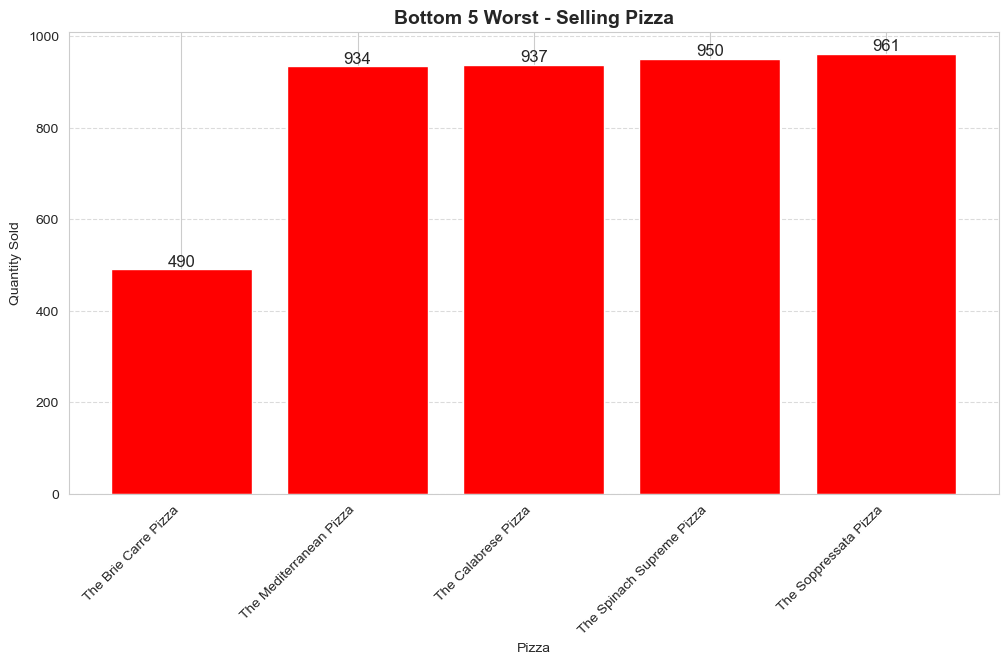

,pizza_name,quantity
2,The Brie Carre Pizza,490
16,The Mediterranean Pizza,934
3,The Calabrese Pizza,937
28,The Spinach Supreme Pizza,950
24,The Soppressata Pizza,961


In [52]:
bottom5 = df.groupby('pizza_name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=True).head(5)

plt.figure(figsize=(12,6))
bars = plt.bar(bottom5['pizza_name'], bottom5['quantity'], color='red')
plt.title('Bottom 5 Worst - Selling Pizza', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Pizza')
plt.ylabel('Quantity Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#data label
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,.0f}", ha='center', va='bottom', fontsize=12)
plt.show()
bottom5

# Weekday-wise Orders

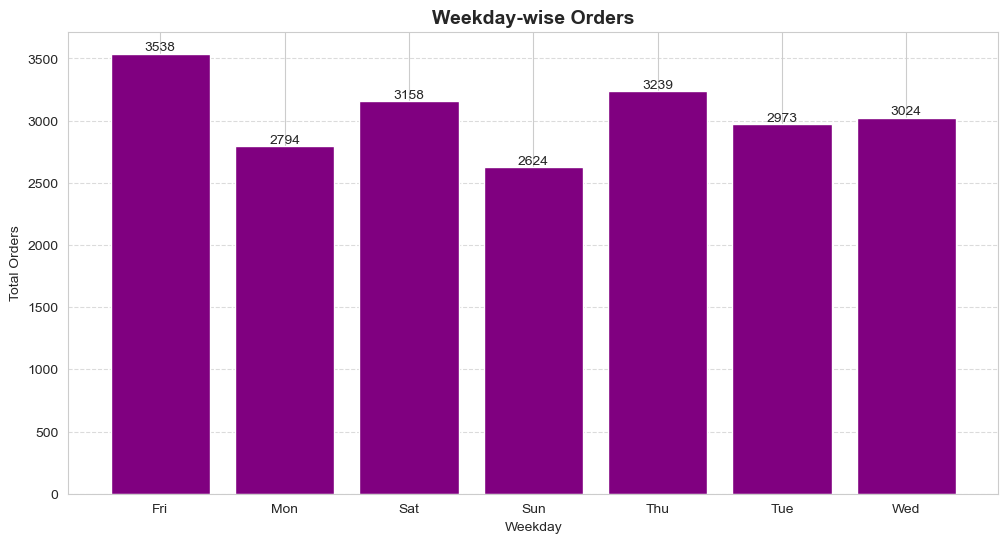

,weekday,order_id
0,Fri,3538
1,Mon,2794
2,Sat,3158
3,Sun,2624
4,Thu,3239
5,Tue,2973
6,Wed,3024


In [58]:
weekday_orders = df.groupby('weekday')['order_id'].nunique().reset_index()

plt.figure(figsize=(12,6))
bars = plt.bar(weekday_orders['weekday'],weekday_orders['order_id'], color='purple')
plt.title('Weekday-wise Orders', fontsize=14, fontweight='bold')
plt.xlabel('Weekday')
plt.ylabel('Total Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# data label
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            str(bar.get_height()), ha='center', va='bottom')

plt.show()
weekday_orders

In [59]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,month_no,day,weekday,hour,Sales_Target
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,Jan,1,1,Thu,11,16.0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,Jan,1,1,Thu,11,19.0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,Jan,1,1,Thu,11,22.0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,Jan,1,1,Thu,11,25.0
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,Jan,1,1,Thu,11,19.0


In [60]:
df['year'].value_counts()

year
2015    48620
Name: count, dtype: int64

# Month wise Total Price vs Quantity

<Figure size 1000x500 with 0 Axes>

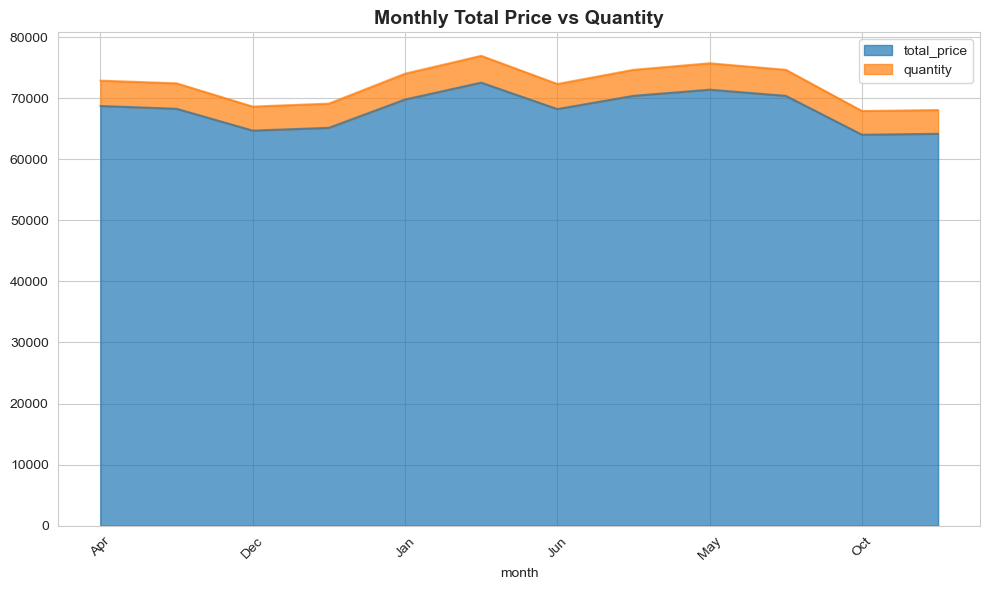

,total_price,quantity
month,,
Apr,68736.80,4151
Aug,68278.25,4168
Dec,64701.15,3935
Feb,65159.60,3961
Jan,69793.30,4232
Jul,72557.90,4392
Jun,68230.20,4107
Mar,70397.10,4261
May,71402.75,4328


In [61]:
plt.figure(figsize=(10,5))
monthly_data = df.groupby('month')[['total_price','quantity']].sum()
monthly_data.plot.area(figsize=(10,6), stacked=True, alpha=0.7)
plt.title('Monthly Total Price vs Quantity', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
monthly_data

# Unit Price vs Quantity by Weekday

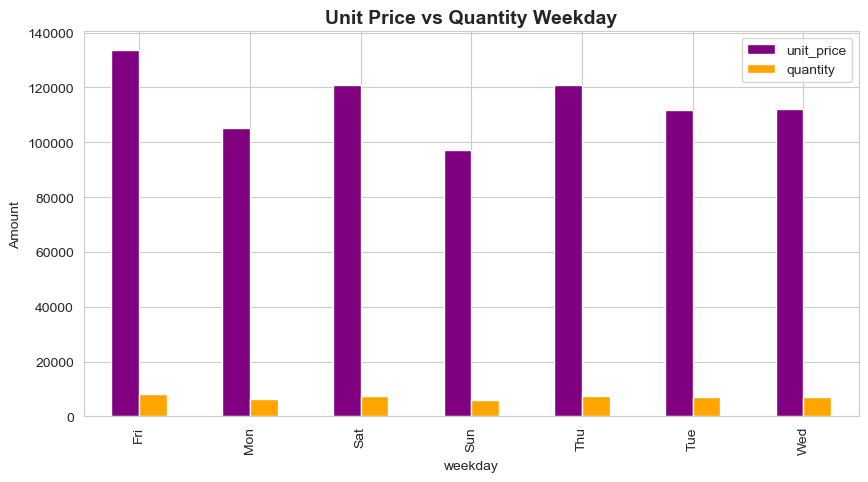

,unit_price,quantity
weekday,,
Fri,133773.90,8242
Mon,105357.15,6485
Sat,120865.30,7493
Sun,97264.75,6035
Thu,120912.45,7478
Tue,111764.70,6895
Wed,112006.45,6946


In [62]:
week_Performance = df.groupby('weekday')[['unit_price', 'quantity']].sum() 
week_Performance.plot(kind='bar', figsize=(10,5), color=['purple', 'orange']) 
plt.title('Unit Price vs Quantity Weekday', fontsize=14, fontweight='bold')
plt.ylabel("Amount")
plt.show() 
week_Performance

# Tree Map

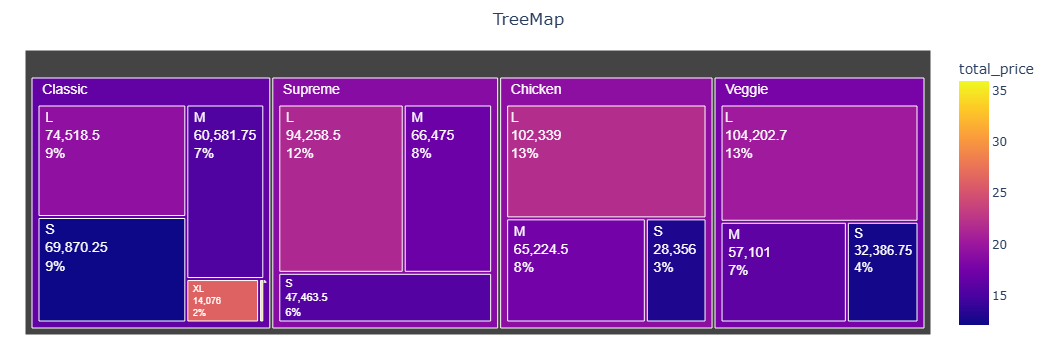

In [63]:
import plotly.express as px


fig = px.treemap(
    df,
    path=['pizza_category', 'pizza_size'],
    values='total_price',
    color='total_price',
    hover_data={'total_price':True}
)
fig.update_traces(textinfo='label+value+percent entry', textfont=dict(size=14, family='Arial', color='white'))
fig.update_layout(title='TreeMap</b>', title_x=0.5, margin=dict(t=50, l=25, r=25, b=25),
                 paper_bgcolor='white',
                 plot_bgcolor='white')
fig.show()

In [64]:
lab = df.groupby(['pizza_category', 'pizza_size'])['total_price'].sum()
lab

pizza_category  pizza_size
Chicken         L             102339.00
                M              65224.50
                S              28356.00
Classic         L              74518.50
                M              60581.75
                S              69870.25
                XL             14076.00
                XXL             1006.60
Supreme         L              94258.50
                M              66475.00
                S              47463.50
Veggie          L             104202.70
                M              57101.00
                S              32386.75
Name: total_price, dtype: float64

In [65]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,month_no,day,weekday,hour,Sales_Target
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,Jan,1,1,Thu,11,16.0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,Jan,1,1,Thu,11,19.0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,Jan,1,1,Thu,11,22.0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,Jan,1,1,Thu,11,25.0
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,Jan,1,1,Thu,11,19.0


# Cards: Toatal Revenue, Total Orders, Avg Price, Total Pizza Order

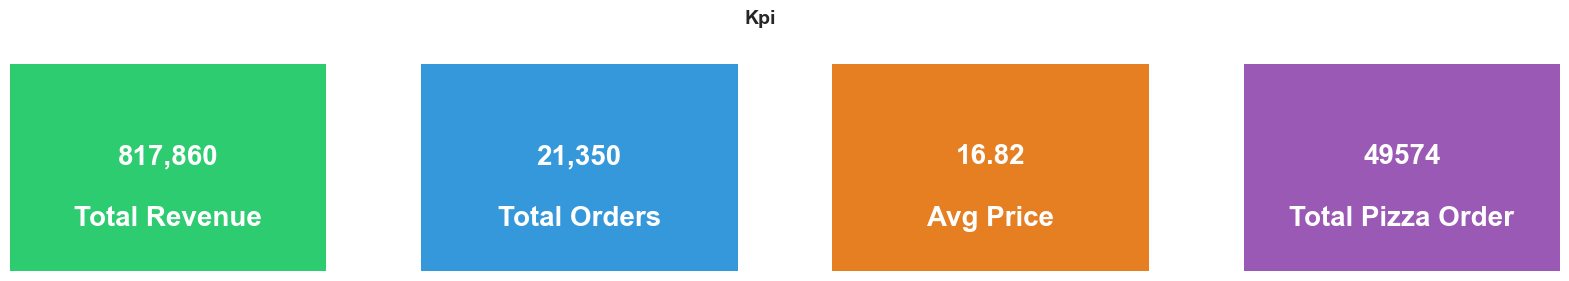

In [66]:
total_revenue = df['total_price'].sum()
total_orders = df['order_id'].nunique()
avg_price = round(df['total_price'].mean(),2)
total_pizza_order = df['quantity'].sum()

kpis_title = ['Total Revenue', 'Total Orders', 'Avg Price', 'Total Pizza Order', 'Total Cost']
kpis = [
    f"{total_revenue:,.0f}",
    f"{total_orders:,}",
    f"{avg_price}",
    f"{total_pizza_order}"]
sns.set_style('white')
fig, axes = plt.subplots(1, 4, figsize=(20,3))
colors=['#2ecc71','#3498db','#e67e22','#9b59b6']

for ax, title, value, color in zip(axes, kpis_title, kpis, colors):
    ax.set_facecolor(color)
    ax.text(0.5, 0.55, value, ha='center', va='center', fontsize=20, color='white', fontweight='bold')
    ax.text(0.5, 0.25, title, ha='center', va='center', fontsize=20, color='white', fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.suptitle('Kpi', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.show()

# Waterfall Chart : Pizza Category by Total Price

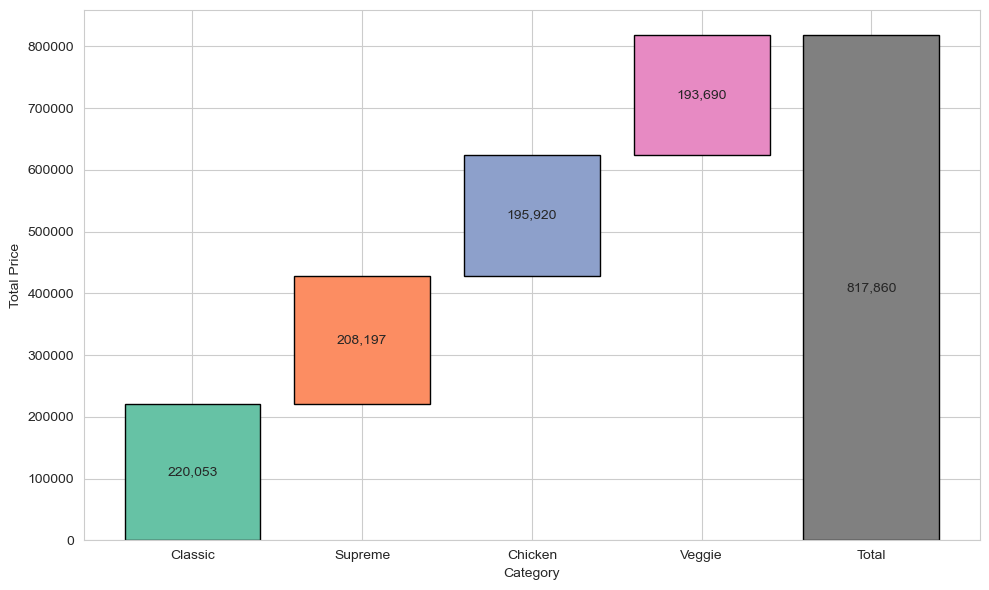

,pizza_category,total_price
0,Classic,220053.10
1,Supreme,208197.00
2,Chicken,195919.50
3,Veggie,193690.45


In [67]:

#waterfall chart
import plotly.graph_objects as go
group_c = df.groupby('pizza_category')['total_price'].sum().reset_index()
group_c = group_c.sort_values('total_price', ascending=False).reset_index(drop=True)
values = group_c['total_price'].values
categories = group_c['pizza_category'].values

cumulative = np.cumsum(values) - values
final_total = values.sum()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

for i, (cat, val, start) in enumerate(zip(categories, values, cumulative)):
    ax.bar(cat, val, bottom=start, color=sns.color_palette('Set2')[i], edgecolor='black')
    ax.text(i, start + val/2, f"{val:,.0f}", ha='center', va='center', fontsize=10)

ax.bar('Total', final_total, color='grey', edgecolor='black')
ax.text(len(categories), final_total/2, f"{final_total:,.0f}", ha='center', va='center', fontsize=10)

ax.set_ylabel('Total Price')
ax.set_xlabel('Category')
plt.tight_layout()
plt.show()
group_c

# Gauge Chart by Category Indicator

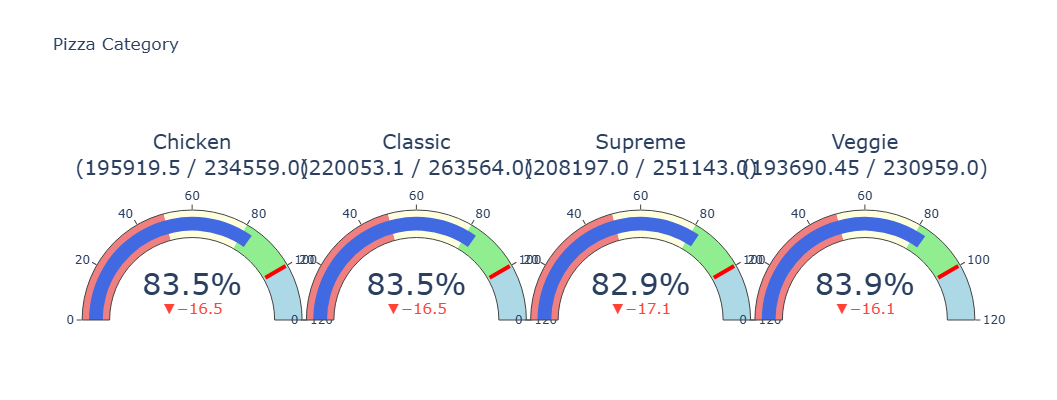

In [68]:
import plotly.graph_objects as go
df['Sales_Target'] = (df['total_price'] * 1.2).round()

df_group = df.groupby('pizza_category').agg({
    'total_price':'sum',
    'Sales_Target':'sum',
}).reset_index()
fig = go.Figure()
for i, row in df_group.iterrows():
    achived = row['total_price']
    target = row['Sales_Target']
    region = row['pizza_category']

    percent = (achived / target) * 100 if target != 0 else 0
    label_text = f"{region}<br>({achived} / {target})" 
    fig.add_trace(go.Indicator(
        mode='gauge+number+delta',
        value=percent,
        number={'suffix': '%'},
        delta={'reference':100},
        title={'text': label_text},
        gauge={
          'axis':{'range':[0, 120]},
          'bar': {'color':'royalblue'},
          'steps':[
              {'range':[0, 50], 'color':'lightcoral'},
              {'range':[50, 80], 'color':'lightyellow'},
              {'range':[80, 100], 'color':'lightgreen'},
              {'range':[100, 120], 'color':'lightblue'},
          ],
            'threshold':{'line':{'color':'red','width':4}, 'value':100}
                        },
        domain={'x': [i*0.25, (i+1)*0.25], 'y': [0, 0.5]}
    ))

fig.update_layout(
    grid={'rows': 1, 'columns': len(df_group), 'pattern':'independent'},
    height=400,
    width=285*len(df_group),
    title='Pizza Category'
)
fig.show()